In [1]:
import pandas as pd
import os
from pathlib import Path
from typing import Union, List

def load_crypto_data(
    base_path: Union[str, Path],
    symbol: str = "BTCUSDT",
    year: str = "2022",
    freq: str = "1m"
) -> pd.DataFrame:
    """
    加載並合併特定交易對的所有每日CSV文件
    
    Args:
        base_path (str/Path): 數據文件的基礎路徑
        symbol (str): 交易對名稱，如 "BTCUSDT"
        year (str): 年份，如 "2022"
        freq (str): 頻率，如 "1m"
    
    Returns:
        pd.DataFrame: 合併後的DataFrame
    """
    # 確保base_path是Path對象
    base_path = Path(base_path)
    
    # 構建文件匹配模式
    pattern = f"{symbol}_{year}-*_{freq}.csv"
    
    # 獲取所有匹配的文件並排序
    csv_files = sorted(list(base_path.glob(pattern)))
    
    if not csv_files:
        raise ValueError(f"No files found matching pattern: {pattern}")
    
    # 讀取並合併所有CSV文件
    dfs = []
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            dfs.append(df)
        except Exception as e:
            print(f"Error reading file {file}: {e}")
    
    # 合併所有DataFrame
    if not dfs:
        raise ValueError("No data was successfully loaded")
    
    merged_df = pd.concat(dfs, ignore_index=True)
    
    # 確保時間列正確格式化
    merged_df['open_time'] = pd.to_datetime(merged_df['open_time'])
    merged_df['close_time'] = pd.to_datetime(merged_df['close_time'])
    
    # 按時間排序
    merged_df = merged_df.sort_values('open_time').reset_index(drop=True)
    
    # 檢查並移除重複數據
    merged_df = merged_df.drop_duplicates(subset=['open_time'], keep='first')
    
    return merged_df

def check_data_quality(df: pd.DataFrame) -> dict:
    """
    檢查合併後數據的質量
    
    Args:
        df (pd.DataFrame): 待檢查的DataFrame
    
    Returns:
        dict: 包含各種數據質量指標的字典
    """
    quality_report = {
        'total_rows': len(df),
        'date_range': (df['open_time'].min(), df['open_time'].max()),
        'missing_values': df.isnull().sum().to_dict(),
        'duplicate_times': len(df) - len(df['open_time'].unique()),
    }
    
    # 檢查時間間隔
    time_diffs = df['open_time'].diff().value_counts()
    quality_report['time_intervals'] = time_diffs
    
    return quality_report

# 使用示例


In [2]:
if __name__ == "__main__":
    # 假設數據路徑
    data_path = "/Users/mouyasushi/Desktop/quantDevops/Backtest_Performance/Alpha-Research/kline/binance/BTCUSDT/1m"
    
    # 加載數據
    btc_data = load_crypto_data(
        base_path=data_path,
        symbol="BTCUSDT",
        year="2024",
        freq="1m"
    )
    
    # 檢查數據質量
    quality_report = check_data_quality(btc_data)
    
    # 輸出基本信息
    print(f"Loaded data shape: {btc_data.shape}")
    print(f"Date range: {quality_report['date_range']}")
    print(f"Total rows: {quality_report['total_rows']}")

Loaded data shape: (488160, 12)
Date range: (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-12-04 23:59:00'))
Total rows: 488160


In [3]:
btc_data

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2024-01-01 00:00:00,42314.0,42335.8,42289.6,42331.9,289.641,2024-01-01 00:00:59.999,1.225616e+07,3310,175.211,7.414460e+06,0
1,2024-01-01 00:01:00,42331.9,42353.1,42331.8,42350.4,202.444,2024-01-01 00:01:59.999,8.572241e+06,1885,154.353,6.535805e+06,0
2,2024-01-01 00:02:00,42350.4,42370.8,42349.6,42360.2,271.521,2024-01-01 00:02:59.999,1.150139e+07,2143,193.034,8.176843e+06,0
3,2024-01-01 00:03:00,42360.1,42405.8,42360.1,42405.8,392.238,2024-01-01 00:03:59.999,1.662644e+07,3551,332.749,1.410472e+07,0
4,2024-01-01 00:04:00,42405.7,42437.2,42405.7,42437.1,568.366,2024-01-01 00:04:59.999,2.411261e+07,4479,419.524,1.779786e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
488155,2024-12-04 23:55:00,98803.5,98835.0,98775.7,98786.1,70.970,2024-12-04 23:55:59.999,7.012476e+06,1567,35.110,3.469313e+06,0
488156,2024-12-04 23:56:00,98786.1,98792.9,98734.6,98770.7,151.892,2024-12-04 23:56:59.999,1.499998e+07,2414,51.604,5.096036e+06,0
488157,2024-12-04 23:57:00,98770.7,98778.0,98740.1,98769.9,73.575,2024-12-04 23:57:59.999,7.265887e+06,1396,19.852,1.960477e+06,0
488158,2024-12-04 23:58:00,98769.9,98769.9,98670.3,98670.3,161.254,2024-12-04 23:58:59.999,1.591837e+07,2367,27.760,2.740686e+06,0


In [4]:
btc_data = btc_data.set_index('open_time')

In [5]:
import numpy as np

# Compute log return
btc_data['log_return'] = np.log(btc_data['close'] / btc_data['close'].shift(1))


In [6]:
# Drop a single column
btc_data = btc_data.drop('ignore', axis=1)

btc_data


,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,log_return
open_time,,,,,,,,,,,
2024-01-01 00:00:00,42314.0,42335.8,42289.6,42331.9,289.641,2024-01-01 00:00:59.999,1.225616e+07,3310,175.211,7.414460e+06,NaN
2024-01-01 00:01:00,42331.9,42353.1,42331.8,42350.4,202.444,2024-01-01 00:01:59.999,8.572241e+06,1885,154.353,6.535805e+06,0.000437
2024-01-01 00:02:00,42350.4,42370.8,42349.6,42360.2,271.521,2024-01-01 00:02:59.999,1.150139e+07,2143,193.034,8.176843e+06,0.000231
2024-01-01 00:03:00,42360.1,42405.8,42360.1,42405.8,392.238,2024-01-01 00:03:59.999,1.662644e+07,3551,332.749,1.410472e+07,0.001076
2024-01-01 00:04:00,42405.7,42437.2,42405.7,42437.1,568.366,2024-01-01 00:04:59.999,2.411261e+07,4479,419.524,1.779786e+07,0.000738
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-04 23:55:00,98803.5,98835.0,98775.7,98786.1,70.970,2024-12-04 23:55:59.999,7.012476e+06,1567,35.110,3.469313e+06,-0.000176
2024-12-04 23:56:00,98786.1,98792.9,98734.6,98770.7,151.892,2024-12-04 23:56:59.999,1.499998e+07,2414,51.604,5.096036e+06,-0.000156
2024-12-04 23:57:00,98770.7,98778.0,98740.1,98769.9,73.575,2024-12-04 23:57:59.999,7.265887e+06,1396,19.852,1.960477e+06,-0.000008


### Vwap 
    - tot: quote_volume / volume 
    - taker : 
    - maker : 


- maker 

- maker buy/sell base asset volume 
- maker buy/sell quote asset volume 
<!-- - maker vwap : maker quote asset volume / maker base asset volume  -->
- maker buy/sell quote ratio 
- maker buy/sell base ratio 

In [7]:
# def calculate_maker_taker_vwaps(df, window=20):
#    """
#    Calculate separate VWAPs for maker and taker trades using rolling window
   
#    Parameters:
#    -----------
#    df : pandas DataFrame
#        Must contain required volume columns
#    window : int
#        Rolling window size in periods (default 20)
#    """
#    # 1. Calculate taker sell volumes first
#    df['taker_sell_base_volume'] = df['volume'] - df['taker_buy_base_asset_volume']
#    df['taker_sell_quote_volume'] = df['quote_asset_volume'] - df['taker_buy_quote_asset_volume']
   
#    # 2. Calculate maker volumes
#    df['maker_buy_base_volume'] = df['taker_sell_base_volume']
#    df['maker_sell_base_volume'] = df['taker_buy_base_asset_volume']
#    df['maker_buy_quote_volume'] = df['taker_sell_quote_volume']
#    df['maker_sell_quote_volume'] = df['taker_buy_quote_asset_volume']
   
#    # 3. Calculate Maker VWAP with rolling window
#    df['maker_vwap'] = ((df['maker_buy_quote_volume'] + df['maker_sell_quote_volume']).rolling(window=window, min_periods=10).sum() / 
#                        (df['maker_buy_base_volume'] + df['maker_sell_base_volume']).rolling(window=window, min_periods=10).sum())
   
#    # 4. Calculate Taker VWAP with rolling window
#    df['taker_vwap'] = ((df['taker_buy_quote_asset_volume'] + df['taker_sell_quote_volume']).rolling(window=window, min_periods=10).sum() / 
#                        (df['taker_buy_base_asset_volume'] + df['taker_sell_base_volume']).rolling(window=window, min_periods=10).sum())
   
#    return df


""" 
maker_vwap will be identical to taker_vwap 

"""

' \nmaker_vwap will be identical to taker_vwap \n\n'

- maker_ratios 

In [9]:
def calculate_maker_ratios(df):
    """
    Calculate VWAPs and maker ratios
    """
    # 1. Calculate taker sell volumes first
    df['taker_sell_base_volume'] = df['volume'] - df['taker_buy_base_asset_volume']
    df['taker_sell_quote_volume'] = df['quote_asset_volume'] - df['taker_buy_quote_asset_volume']
    
    # 2. Calculate maker volumes
    df['maker_buy_base_volume'] = df['taker_sell_base_volume']
    df['maker_sell_base_volume'] = df['taker_buy_base_asset_volume']
    df['maker_buy_quote_volume'] = df['taker_sell_quote_volume']
    df['maker_sell_quote_volume'] = df['taker_buy_quote_asset_volume']
    
    # 3. Calculate maker buy/sell ratios
    df['maker_base_ratio'] = df['maker_buy_base_volume'] / df['maker_sell_base_volume']
    

    
    return df


df = calculate_maker_ratios(btc_data)
df['maker_base_ratio']

open_time
2024-01-01 00:00:00    0.653098
2024-01-01 00:01:00    0.311565
2024-01-01 00:02:00    0.406597
2024-01-01 00:03:00    0.178780
2024-01-01 00:04:00    0.354788
                         ...   
2024-12-04 23:55:00    1.021361
2024-12-04 23:56:00    1.943415
2024-12-04 23:57:00    2.706176
2024-12-04 23:58:00    4.808862
2024-12-04 23:59:00    1.108016
Name: maker_base_ratio, Length: 488160, dtype: float64

Basic Statistics:
count    488139.0000
mean          1.5054
std           1.8988
min           0.0079
25%           0.5772
50%           1.0228
75%           1.8094
max         165.4641
Name: maker_base_ratio, dtype: float64

Additional Statistics:
Skewness: 12.4533
Kurtosis: 527.8883
Median: 1.0228
Mode: 1.0000
Variance: 3.6053
Number of NaN: 21.0000
% of values > 1: 51.0386
% of values < 1: 48.9551


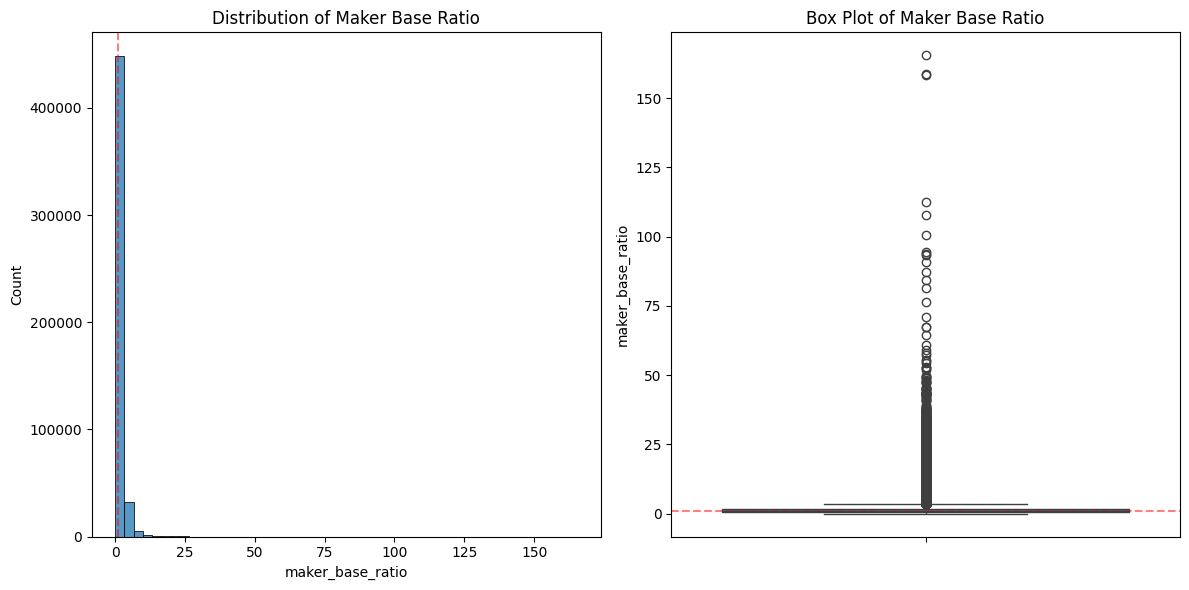

In [10]:
# stats of maker_base_ratio 


import matplotlib.pyplot as plt 
import seaborn as sns 
# Basic statistics
print("Basic Statistics:")
print(df['maker_base_ratio'].describe().round(4))

# Additional statistics
stats = {
    'Skewness': df['maker_base_ratio'].skew(),
    'Kurtosis': df['maker_base_ratio'].kurtosis(),
    'Median': df['maker_base_ratio'].median(),
    'Mode': df['maker_base_ratio'].mode().iloc[0],
    'Variance': df['maker_base_ratio'].var(),
    'Number of NaN': df['maker_base_ratio'].isna().sum(),
    '% of values > 1': (df['maker_base_ratio'] > 1).mean() * 100,
    '% of values < 1': (df['maker_base_ratio'] < 1).mean() * 100
}

print("\nAdditional Statistics:")
for name, value in stats.items():
    print(f"{name}: {value:.4f}")

# Distribution plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['maker_base_ratio'], bins=50)
plt.axvline(x=1, color='r', linestyle='--', alpha=0.5)
plt.title('Distribution of Maker Base Ratio')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['maker_base_ratio'])
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)
plt.title('Box Plot of Maker Base Ratio')

plt.tight_layout()
plt.show()

### transformation of maker_base_ratio
    - 定量分析：will use future value 

In [11]:
# # 1. Log transformation to handle skewness
# df['maker_base_ratio_log'] = np.log1p(df['maker_base_ratio'])

# # 2. Z-score standardization
# df['maker_base_ratio_zscore'] = (df['maker_base_ratio'] - df['maker_base_ratio'].mean()) / df['maker_base_ratio'].std()

# # 3. Min-Max scaling to [0,1] range
# df['maker_base_ratio_minmax'] = (df['maker_base_ratio'] - df['maker_base_ratio'].min()) / (df['maker_base_ratio'].max() - df['maker_base_ratio'].min())

# # 4. Centered around 1 (relative to neutral point)
# df['maker_base_ratio_centered'] = df['maker_base_ratio'] - 1

# # 5. Winsorization to handle outliers
# def winsorize_ratio(series, lower=0.05, upper=0.95):
#     lower_bound = series.quantile(lower)
#     upper_bound = series.quantile(upper)
#     return np.clip(series, lower_bound, upper_bound)

# df['maker_base_ratio_winsor'] = winsorize_ratio(df['maker_base_ratio'])


# def transform_maker_ratio(df, lower=0.05, upper=0.95):
#     # First winsorize to handle extreme outliers
#     ratio_winsor = winsorize_ratio(df['maker_base_ratio'], lower, upper)
    
#     # Then log transform to handle remaining skewness
#     ratio_log = np.log1p(ratio_winsor)
    
#     # Finally standardize
#     ratio_final = (ratio_log - ratio_log.mean()) / ratio_log.std()
    
#     return ratio_final

# df['maker_base_ratio_transformed'] = transform_maker_ratio(df)

In [12]:
# def plot_transformations(df):
#     """
#     Plot different transformations of maker_base_ratio
#     """
#     # Create transformations
#     df['maker_base_ratio_log'] = np.log1p(df['maker_base_ratio'])
#     df['maker_base_ratio_zscore'] = (df['maker_base_ratio'] - df['maker_base_ratio'].mean()) / df['maker_base_ratio'].std()
#     df['maker_base_ratio_minmax'] = (df['maker_base_ratio'] - df['maker_base_ratio'].min()) / (df['maker_base_ratio'].max() - df['maker_base_ratio'].min())
#     df['maker_base_ratio_centered'] = df['maker_base_ratio'] - 1
    
#     # Winsorization
#     lower_bound = df['maker_base_ratio'].quantile(0.05)
#     upper_bound = df['maker_base_ratio'].quantile(0.95)
#     df['maker_base_ratio_winsor'] = np.clip(df['maker_base_ratio'], lower_bound, upper_bound)
    
#     # Combined transformation
#     ratio_winsor = df['maker_base_ratio_winsor']
#     ratio_log = np.log1p(ratio_winsor)
#     df['maker_base_ratio_transformed'] = (ratio_log - ratio_log.mean()) / ratio_log.std()

#     # Create subplot
#     fig, axes = plt.subplots(3, 2, figsize=(15, 15))
#     fig.suptitle('Different Transformations of Maker Base Ratio')

#     # Original
#     sns.histplot(df['maker_base_ratio'], bins=50, ax=axes[0,0])
#     axes[0,0].set_title('Original')
#     axes[0,0].axvline(x=1, color='r', linestyle='--', alpha=0.5)

#     # Log transformation
#     sns.histplot(df['maker_base_ratio_log'], bins=50, ax=axes[0,1])
#     axes[0,1].set_title('Log Transformed')

#     # Z-score
#     sns.histplot(df['maker_base_ratio_zscore'], bins=50, ax=axes[1,0])
#     axes[1,0].set_title('Z-score Standardized')

#     # Min-Max
#     sns.histplot(df['maker_base_ratio_minmax'], bins=50, ax=axes[1,1])
#     axes[1,1].set_title('Min-Max Scaled')

#     # Winsorized
#     sns.histplot(df['maker_base_ratio_winsor'], bins=50, ax=axes[2,0])
#     axes[2,0].set_title('Winsorized (5-95%)')
#     axes[2,0].axvline(x=1, color='r', linestyle='--', alpha=0.5)

#     # Combined transformation
#     sns.histplot(df['maker_base_ratio_transformed'], bins=50, ax=axes[2,1])
#     axes[2,1].set_title('Combined (Winsor + Log + Standardize)')

#     plt.tight_layout()
#     plt.show()

#     # Print statistics for each transformation
#     transformations = ['maker_base_ratio', 'maker_base_ratio_log', 'maker_base_ratio_zscore', 
#                       'maker_base_ratio_minmax', 'maker_base_ratio_winsor', 'maker_base_ratio_transformed']
    
#     print("\nStatistics for each transformation:")
#     for col in transformations:
#         print(f"\n{col}:")
#         stats = {
#             'mean': df[col].mean(),
#             'std': df[col].std(),
#             'skew': df[col].skew(),
#             'kurtosis': df[col].kurtosis(),
#             'min': df[col].min(),
#             'max': df[col].max()
#         }
#         for name, value in stats.items():
#             print(f"{name}: {value:.4f}")

# # Call the function
# plot_transformations(df)

#### rolling transformed maker_base_ratio 
    - without look ahead bias 


Statistics for each transformation:

maker_base_ratio:
mean: 1.5054
std: 1.8988
skew: 12.4533
kurtosis: 527.8883
min: 0.0079
max: 165.4641

maker_base_ratio_winsorized:
mean: 1.4467
std: 1.4430
skew: 4.0368
kurtosis: 38.8295
min: 0.0213
max: 58.0930

maker_base_ratio_log:
mean: 0.7903
std: 0.4543
skew: 1.2182
kurtosis: 2.4517
min: 0.0079
max: 5.1148

maker_base_ratio_transformed:
mean: 0.0084
std: 1.0339
skew: 0.7217
kurtosis: -0.0434
min: -2.1892
max: 5.4063


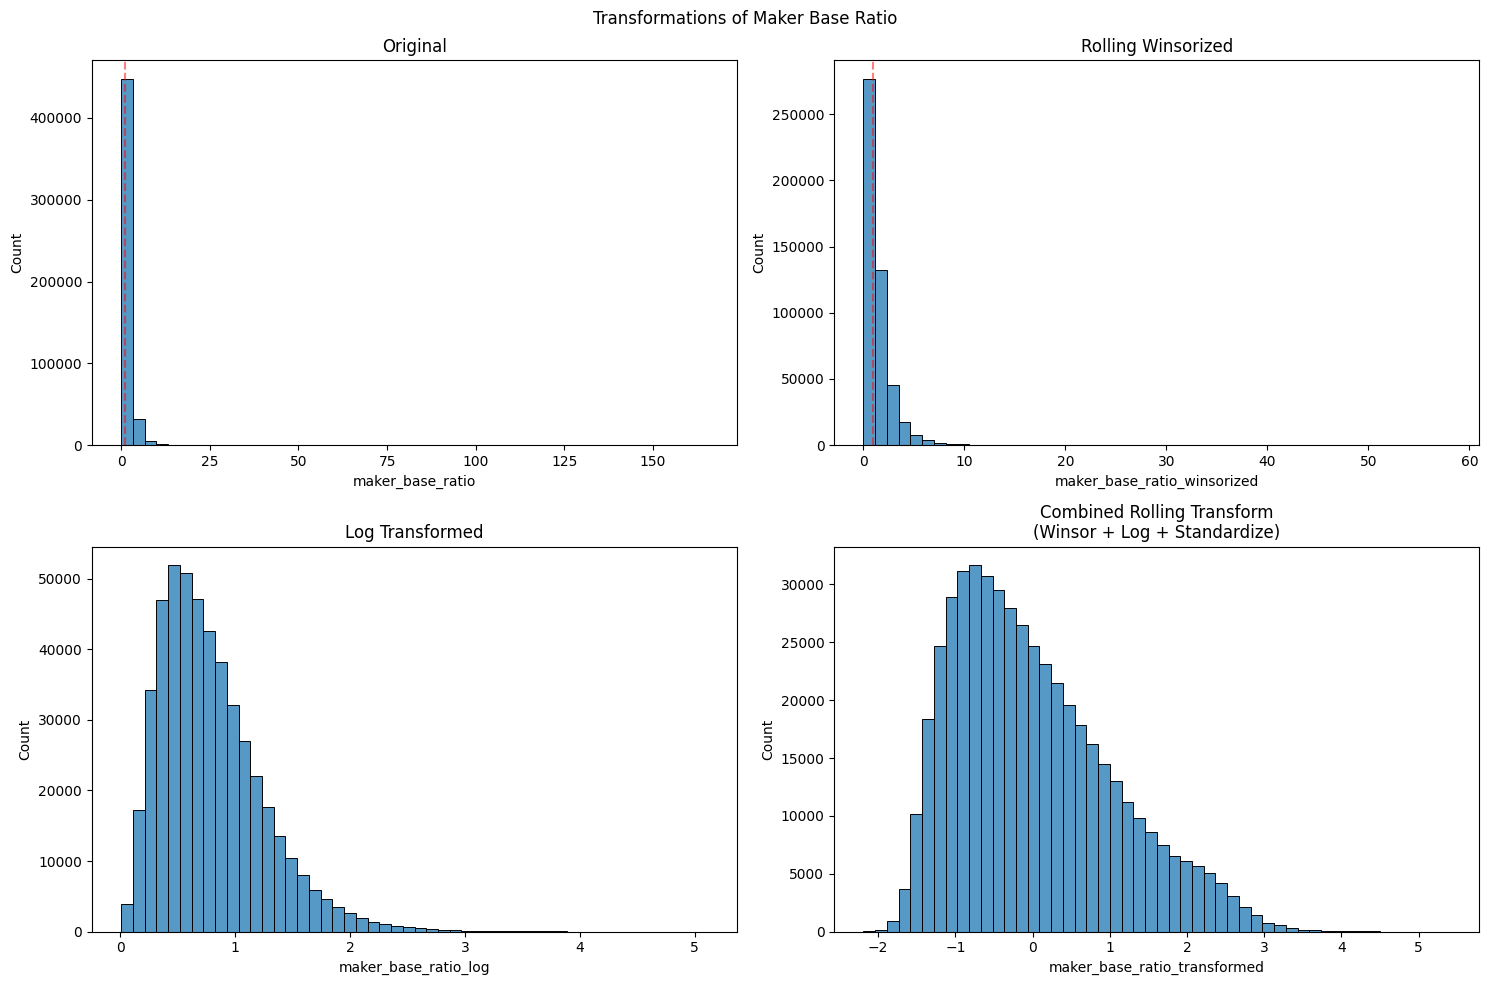

In [16]:
def rolling_combined_transform_no_lookahead(df, window=60, min_periods=60, lower=0.01, upper=0.99):
    """
    Apply rolling winsorization + log transform + standardization using only past data
    """
    winsorized_series = pd.Series(index=df.index, dtype=float)
    transformed_series = pd.Series(index=df.index, dtype=float)
    
    # Iterate through the data using only past information
    for i in range(len(df)):
        if i < min_periods: 
            # For initial period, just use the original value
            winsorized_series.iloc[i] = df['maker_base_ratio'].iloc[i]
            transformed_series.iloc[i] = df['maker_base_ratio'].iloc[i]
            continue
            
        # Use only past window data
        past_window = df['maker_base_ratio'].iloc[max(0, i-window):i]
        
        # Step 1: Winsorization
        lower_bound = past_window.quantile(lower)
        upper_bound = past_window.quantile(upper)
        current_value = df['maker_base_ratio'].iloc[i]
        winsorized_value = np.clip(current_value, lower_bound, upper_bound)
        winsorized_series.iloc[i] = winsorized_value
        
        # Step 2: Log transformation : np.log1p  = log(1+x)
        past_window_winsorized = winsorized_series.iloc[max(0, i-window):i]
        past_window_log = np.log1p(past_window_winsorized)
        
        # Step 3: Calculate standardization parameters from past data
        past_mean = past_window_log.mean()
        past_std = past_window_log.std()
        
        # Step 4: Apply combined transformation to --> current value
        # Log transform the winsorized value
        log_value = np.log1p(winsorized_value)
        
        # Standardize using past window statistics
        if past_std != 0:  # Avoid division by zero
            transformed_value = (log_value - past_mean) / past_std
        else:
            transformed_value = log_value - past_mean
            
        transformed_series.iloc[i] = transformed_value
    
    return winsorized_series, transformed_series

def analyze_transformations(df):   # print out statistic 
    """
    Apply transformations and analyze results
    """
    # Apply rolling transformations
    df['maker_base_ratio_winsorized'], df['maker_base_ratio_transformed'] = \
        rolling_combined_transform_no_lookahead(df)
    
    # Calculate additional metrics for comparison
    df['maker_base_ratio_log'] = np.log1p(df['maker_base_ratio'])
    df['maker_base_ratio_centered'] = df['maker_base_ratio'] - 1
    
    # Print statistics for each transformation
    transformations = [
        'maker_base_ratio', 
        'maker_base_ratio_winsorized',
        'maker_base_ratio_log', 
        'maker_base_ratio_transformed'
    ]
    
    print("\nStatistics for each transformation:")
    for col in transformations:
        print(f"\n{col}:")
        stats = {
            'mean': df[col].mean(),
            'std': df[col].std(),
            'skew': df[col].skew(),
            'kurtosis': df[col].kurtosis(),
            'min': df[col].min(),
            'max': df[col].max()
        }
        for name, value in stats.items():
            print(f"{name}: {value:.4f}")
    
    return df

def plot_transformations(df):  # plot only 
    """
    Plot the original and transformed series
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Transformations of Maker Base Ratio')

    # Original
    sns.histplot(df['maker_base_ratio'], bins=50, ax=axes[0,0])
    axes[0,0].set_title('Original')
    axes[0,0].axvline(x=1, color='r', linestyle='--', alpha=0.5)

    # Winsorized
    sns.histplot(df['maker_base_ratio_winsorized'], bins=50, ax=axes[0,1])
    axes[0,1].set_title('Rolling Winsorized')
    axes[0,1].axvline(x=1, color='r', linestyle='--', alpha=0.5)

    # Log transformed
    sns.histplot(df['maker_base_ratio_log'], bins=50, ax=axes[1,0])
    axes[1,0].set_title('Log Transformed')

    # Combined transformation
    sns.histplot(df['maker_base_ratio_transformed'], bins=50, ax=axes[1,1])
    axes[1,1].set_title('Combined Rolling Transform\n(Winsor + Log + Standardize)')

    plt.tight_layout()
    plt.show()

# Apply the transformations and analyze
df = analyze_transformations(df)

# Plot the results
plot_transformations(df)

- see kde 

<Axes: xlabel='maker_base_ratio_transformed', ylabel='Density'>

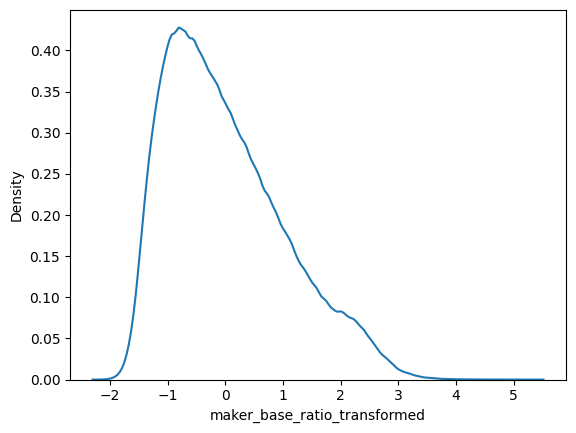

In [17]:
import seaborn as sns
sns.kdeplot(df['maker_base_ratio_transformed'], bw_adjust=0.5)


## Predictibility test 

In [18]:
# 使用 rename 方法重命名欄位
df = df.rename(columns={'log_return': 'log_returns'})

In [20]:
def analyze_single_lag_predictability(df, lag=1, window=60):
    """
    分析單一延遲期的預測能力，使用滾動窗口方法
    
    這個函數專注於分析maker_base_ratio_transformed對未來報酬的預測關係，
    使用滾動窗口來確保分析的穩定性和時變特性
    """
    # 創建延遲特徵（確保不使用未來信息）
    feature = df['maker_base_ratio_transformed'].shift(lag)
    target = df['log_returns']
    
    # 初始化結果數列
    rolling_corr = pd.Series(index=df.index, dtype=float)
    rolling_rank_ic = pd.Series(index=df.index, dtype=float)
    
    # 使用滾動窗口計算相關性指標
    for i in range(window, len(df)):
        # 獲取當前窗口的數據
        window_feature = feature.iloc[i-window:i]
        window_target = target.iloc[i-window:i]
        
        # 計算Pearson相關係數
        rolling_corr.iloc[i] = window_feature.corr(window_target)
        
        # 計算Rank IC（Spearman相關係數）
        rolling_rank_ic.iloc[i] = window_feature.corr(window_target, method='spearman')
    
    # 計算統計指標
    stats = {
        'mean_ic': rolling_corr.mean(),
        'ic_std': rolling_corr.std(),
        'ic_ir': rolling_corr.mean() / rolling_corr.std(),
        'mean_rank_ic': rolling_rank_ic.mean(),
        'rank_ic_std': rolling_rank_ic.std(),
        'rank_ir': rolling_rank_ic.mean() / rolling_rank_ic.std(),
        'positive_ic_ratio': (rolling_corr > 0).mean()
    }
    
    return rolling_corr, rolling_rank_ic, stats

def analyze_predictability_detail(df):
    """
    詳細分析預測能力，包括不同延遲期的對比
    """
    lags = [1, 2, 3, 5, 10]  # 可以根據需要調整
    results = {}
    
    for lag in lags:
        rolling_corr, rolling_rank_ic, stats = analyze_single_lag_predictability(df, lag)
        results[lag] = {
            'rolling_corr': rolling_corr,
            'rolling_rank_ic': rolling_rank_ic,
            'stats': stats
        }
        
        print(f"\n延遲{lag}期的分析結果：")
        for metric, value in stats.items():
            print(f"{metric}: {value:.4f}")
    
    # 視覺化分析
    plot_detailed_analysis(results, lags)
    
    return results

def plot_detailed_analysis(results, lags):
    """
    創建詳細的視覺化分析
    """
    plt.figure(figsize=(15, 12))
    
    # 1. IC時間序列圖
    plt.subplot(2, 1, 1)
    for lag in lags:
        plt.plot(results[lag]['rolling_corr'], 
                label=f'Lag {lag}', alpha=0.7)
    plt.title('Rolling Information Coefficient (IC) Over Time')
    plt.legend()
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    
    # 2. Rank IC時間序列圖
    plt.subplot(2, 1, 2)
    for lag in lags:
        plt.plot(results[lag]['rolling_rank_ic'], 
                label=f'Lag {lag}', alpha=0.7)
    plt.title('Rolling Rank IC Over Time')
    plt.legend()
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [21]:
def conditional_analysis(df, lag=1, window=60):
    """
    在不同市場條件下分析預測能力
    """
    # 計算波動率
    df['volatility'] = df['log_returns'].rolling(window).std()
    df['vol_regime'] = pd.qcut(df['volatility'], 3, labels=['Low', 'Medium', 'High'])
    
    # 準備特徵和目標
    feature = df['maker_base_ratio_transformed'].shift(lag)
    target = df['log_returns']
    
    # 按波動率區間分析
    regime_results = {}
    for regime in ['Low', 'Medium', 'High']:
        mask = df['vol_regime'] == regime
        regime_results[regime] = {
            'ic': feature[mask].corr(target[mask]),
            'rank_ic': feature[mask].corr(target[mask], method='spearman'),
            'count': mask.sum()
        }
    
    # 按時間段分析（例如每天不同時段）
    if 'hour' in df.index.names:
        hour_results = {}
        for hour in df.index.get_level_values('hour').unique():
            hour_mask = df.index.get_level_values('hour') == hour
            hour_results[hour] = {
                'ic': feature[hour_mask].corr(target[hour_mask]),
                'rank_ic': feature[hour_mask].corr(target[hour_mask], method='spearman'),
                'count': hour_mask.sum()
            }
    else:
        hour_results = None
    
    return regime_results, hour_results



延遲1期的分析結果：
mean_ic: 0.0191
ic_std: 0.1298
ic_ir: 0.1469
mean_rank_ic: 0.0255
rank_ic_std: 0.1298
rank_ir: 0.1963
positive_ic_ratio: 0.5547

延遲2期的分析結果：
mean_ic: 0.0162
ic_std: 0.1273
ic_ir: 0.1275
mean_rank_ic: 0.0188
rank_ic_std: 0.1272
rank_ir: 0.1480
positive_ic_ratio: 0.5494

延遲3期的分析結果：
mean_ic: 0.0131
ic_std: 0.1271
ic_ir: 0.1031
mean_rank_ic: 0.0142
rank_ic_std: 0.1272
rank_ir: 0.1117
positive_ic_ratio: 0.5359

延遲5期的分析結果：
mean_ic: 0.0036
ic_std: 0.1274
ic_ir: 0.0285
mean_rank_ic: 0.0030
rank_ic_std: 0.1283
rank_ir: 0.0235
positive_ic_ratio: 0.5112

延遲10期的分析結果：
mean_ic: 0.0084
ic_std: 0.1286
ic_ir: 0.0650
mean_rank_ic: 0.0086
rank_ic_std: 0.1288
rank_ir: 0.0670
positive_ic_ratio: 0.5295


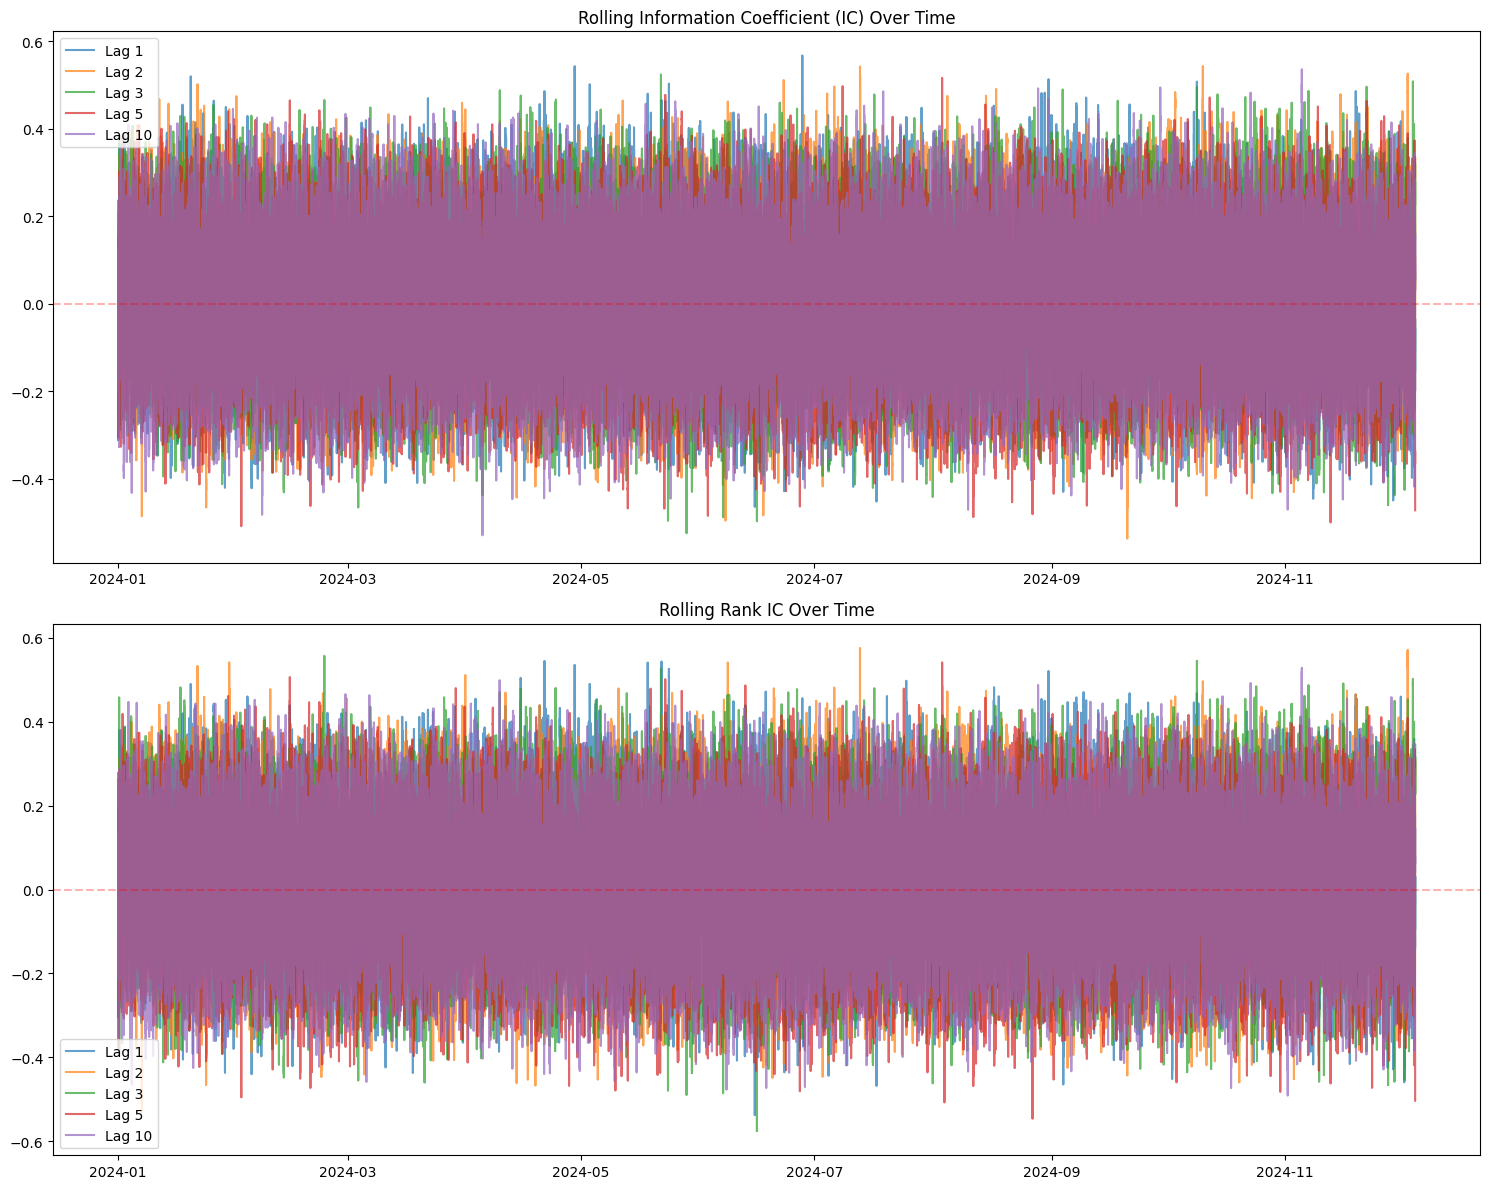

In [22]:
# 使用範例：
lag = 1
window = 60

# 基礎預測能力分析
results = analyze_predictability_detail(df)



- 請執行以下

In [ ]:
# 條件分析
regime_results, hour_results = conditional_analysis(df, lag, window)

# 打印條件分析結果
print("\n不同波動率區間的預測能力：")
for regime, stats in regime_results.items():
    print(f"\n{regime} 波動率區間:")
    for metric, value in stats.items():
        print(f"{metric}: {value:.4f}")

if hour_results:
    print("\n不同時段的預測能力：")
    for hour, stats in hour_results.items():
        print(f"\n小時 {hour}:")
        for metric, value in stats.items():
            print(f"{metric}: {value:.4f}")

- predictibility in detail 
    - 將特徵值分成n個分位數，分析每個分位數組別的未來收益表現

In [20]:
import scipy

def analyze_by_quantiles(df, n_quantiles=5):
    """

    
    Parameters:
    -----------
    df : pandas DataFrame
        需要包含 'maker_base_ratio_transformed' 和 'log_returns' 欄位
    n_quantiles : int
        要分成幾個分位數組別
    """
    # 直接對特徵值進行分位數分組，不使用 groupby
    df['quantile'] = pd.qcut(df['maker_base_ratio_transformed'], 
                           n_quantiles, 
                           labels=False, 
                           duplicates='drop')
    
    # 計算每個分位數組別的未來收益統計
    quantile_stats = df.groupby('quantile')['log_returns'].agg([
        ('mean', 'mean'),
        ('std', 'std'),
        ('count', 'count'),
        ('skewness', lambda x: x.skew()),
        ('p_value', lambda x: scipy.stats.ttest_1samp(x, 0.0)[1])
    ]).round(4)
    
    # 增加解釋性的輸出
    print("\n分位數分析結果解釋：")
    print("-" * 50)
    print(f"共分成 {n_quantiles} 個組別")
    print("第0組代表特徵值最小的組別，最後一組代表特徵值最大的組別")
    print("\n統計值解釋：")
    print("mean: 各組別的平均收益率")
    print("std: 收益率的標準差")
    print("count: 各組別的樣本數量")
    print("skewness: 收益率分佈的偏度")
    print("p_value: t檢定的p值，檢驗該組收益率是否顯著不為0")
    
    return quantile_stats



# 使用函數
results = analyze_by_quantiles(df, 5)
print("\n詳細統計結果：")
print(results)


分位數分析結果解釋：
--------------------------------------------------
共分成 5 個組別
第0組代表特徵值最小的組別，最後一組代表特徵值最大的組別

統計值解釋：
mean: 各組別的平均收益率
std: 收益率的標準差
count: 各組別的樣本數量
skewness: 收益率分佈的偏度
p_value: t檢定的p值，檢驗該組收益率是否顯著不為0

詳細統計結果：
            mean     std  count  skewness  p_value
quantile                                          
0.0       0.0006  0.0007  97628    4.4378   0.0000
1.0       0.0003  0.0006  97628    3.3351   0.0000
2.0       0.0000  0.0005  97627    1.6261   0.1238
3.0      -0.0003  0.0006  97627   -6.3483      NaN
4.0      -0.0006  0.0007  97628   -6.0153   0.0000


""" 

收益率模式分析：

第0組（最低分位數）：平均收益率為 +0.0006
第4組（最高分位數）：平均收益率為 -0.0006
呈現出完美的單調遞減趨勢：0.0006 → 0.0003 → 0.0000 → -0.0003 → -0.0006

這個模式非常顯著，因為：

收益率從最低分位數到最高分位數呈現近乎完美的線性遞減
最高和最低分位數的收益率大小相同但符號相反，這種對稱性非常罕見
中間分位數（第2組）的收益率接近於0，這表明這是一個很好的中性點

統計顯著性：

p值在第0、1和4組都是0.0000，表示這些組別的收益率顯著異於0
第2組的p值為0.1238，這很合理，因為這是中性組，預期收益接近0
第3組顯示為NaN，這可能需要進一步調查

風險特徵（標準差）：

標準差範圍在0.0005到0.0007之間
最外側的分位數（0和4組）有較高的波動性（0.0007）
中間分位數有較低的波動性（0.0005）
這種"U形"風險模式在金融中很常見，表明極端值可能帶來更高的波動性

分佈特徵（偏度）：

偏度值顯示出明顯的非對稱性
低分位數組（0和1）顯示正偏度（3.3351到4.4378）
高分位數組（3和4）顯示負偏度（-6.3483到-6.0153）
這種偏度模式表明極端收益率的出現是不對稱的

樣本分配：

每個分位數組的樣本數幾乎完全相等（約97,627-97,628個樣本）
這種均勻的分配表明分位數切分做得很好，沒有數據集中的問題

策略啟示：

交易信號強度：

可以考慮只在最外側的分位數（0和4組）進行交易
預期收益率的絕對值（0.0006）相對標準差（0.0007）的比率接近1，這是不錯的風險收益比


風險管理：

需要注意極端分位數組別的較高波動性
可能需要在高波動期間調整持倉規模


策略設計：

可以設計做多最低分位數、做空最高分位數的對沖策略
中性組（第2組）可以用作風險控制的基準


- Conditional Information Ratio

In [21]:
def analyze_conditional_ir(df, window=60):
    """
    分析在不同市場條件下的訊息比率
    """
    # 計算條件波動率
    df['volatility'] = df['log_returns'].rolling(window).std()
    
    # 計算每個波動率區間的IR
    vol_quantiles = pd.qcut(df['volatility'], 3, labels=['Low', 'Medium', 'High'])
    
    ir_by_regime = {}
    for regime in ['Low', 'Medium', 'High']:
        mask = vol_quantiles == regime
        returns = df[mask]['log_returns']
        signal = df[mask]['maker_base_ratio_transformed']
        
        ir = (signal * returns).mean() / (signal * returns).std() * np.sqrt(252)
        ir_by_regime[regime] = ir
        
    return ir_by_regime

analyze_conditional_ir(df)

{'Low': -9.378839669574045,
 'Medium': -9.701214781780541,
 'High': -8.974069630667113}

- Decay Analysis

In [23]:
def analyze_predictive_decay(df, max_lag=10):
    """
    分析預測能力隨時間延遲的衰減情況
    """
    decay_results = {}
    
    for lag in range(1, max_lag + 1):
        # 計算不同延遲期的預測相關性
        feature_lagged = df['maker_base_ratio_transformed'].shift(lag)
        corr = feature_lagged.corr(df['log_returns'])
        rank_corr = feature_lagged.corr(df['log_returns'], method='spearman')
        
        decay_results[lag] = {
            'corr': corr,
            'rank_corr': rank_corr
        }
    
    return pd.DataFrame(decay_results).T


analyze_predictive_decay(df)

,corr,rank_corr
1,0.008086,0.018366
2,0.006266,0.012250
3,0.004645,0.007706
4,0.001945,0.002378
5,-0.002647,-0.002833
6,0.001371,0.002598
7,0.003457,0.005840
8,0.002038,0.003996
9,0.004804,0.006692
10,0.002733,0.003257


""" 
result : 
Is better at predicting the direction or relative magnitude of returns rather than their exact values
Might have some non-linear relationships with future returns
Could be more effective in a ranking-based trading strategy
""" 

- Stability Test

In [25]:
def test_stability(df, window=60, n_bootstraps=1000):
    """
    使用bootstrap方法測試預測關係的穩定性
    """
    ic_bootstraps = []
    
    for _ in range(n_bootstraps):
        # 隨機抽樣時間段
        sample_idx = np.random.choice(
            range(len(df) - window), 
            size=len(df)//window, 
            replace=True
        )
        
        # 計算每個樣本的IC
        sample_ic = []
        for idx in sample_idx:
            window_data = df.iloc[idx:idx+window]
            ic = window_data['maker_base_ratio_transformed'].corr(
                window_data['log_returns']
            )
            sample_ic.append(ic)
        
        ic_bootstraps.append(np.mean(sample_ic))
    
    # 計算置信區間
    confidence_interval = np.percentile(ic_bootstraps, [2.5, 97.5])
    
    return {
        'mean_ic': np.mean(ic_bootstraps),
        'std_ic': np.std(ic_bootstraps),
        'confidence_interval': confidence_interval
    }
    
    
test_stability(df)

{'mean_ic': -0.6708140819413755,
 'std_ic': 0.0008718314160066905,
 'confidence_interval': array([-0.67246088, -0.66909692])}

- Data Mining Bias Ratio

In [26]:
def calculate_dmb_ratio(df, window=60):
    """
    計算數據挖掘偏差比率，評估預測關係是否穩健
    """
    # 計算實際IC的t統計量
    rolling_ic = df['maker_base_ratio_transformed'].rolling(window).corr(df['log_returns'])
    t_stat = rolling_ic.mean() / (rolling_ic.std() / np.sqrt(len(rolling_ic)))
    
    # 計算DMB ratio
    dmb_ratio = t_stat / np.sqrt(len(rolling_ic))
    
    return dmb_ratio


calculate_dmb_ratio(df)

-8.727267052998023

#### Rolling siganls for trading 

- 做成不同時間 MA 
- 單純看threshold 決定多空

#### NOte:
印寬看到這邊即可 

- look into detail 

In [ ]:
def plot_ratio_and_price(df, start_date=None, end_date=None):
    """
    Plot maker base ratio and close price for a specific date range
    
    Parameters:
    -----------
    df : pandas DataFrame
    start_date : str, optional (format: 'YYYY-MM-DD HH:MM:SS')
    end_date : str, optional (format: 'YYYY-MM-DD HH:MM:SS')
    """
    # Filter DataFrame if dates are provided
    if start_date and end_date:
        df_subset = df[start_date:end_date]
    else:
        df_subset = df
        
    # Create figure and axis objects with a single subplot
    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Plot close price on primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Close Price', color=color)
    ax1.plot(df_subset.index, df_subset['close'], color=color, label='Close Price')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create second y-axis that shares x-axis
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Maker Base Ratio', color=color)
    ax2.plot(df_subset.index, df_subset['maker_base_ratio'], color=color, alpha=0.6, label='Maker Base Ratio')
    ax2.tick_params(axis='y', labelcolor=color)

    # Add horizontal line at ratio = 1
    ax2.axhline(y=1, color='grey', linestyle='--', alpha=0.3)

    # Add title with date range
    if start_date and end_date:
        plt.title(f'Close Price vs Maker Base Ratio ({start_date} to {end_date})')
    else:
        plt.title('Close Price vs Maker Base Ratio (Full Range)')

    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.tight_layout()
    plt.show()

# Usage examples:
# Look at January 2024
plot_ratio_and_price(df, '2024-01-01', '2024-01-03')

# Look at a specific day
# plot_ratio_and_price(df, '2024-01-01', '2024-01-02')

# Look at a specific hour
# plot_ratio_and_price(df, '2024-01-01 10:00:00', '2024-01-01 11:00:00')

# Full range


#### Rolling Corr 

- maker_base_ratio corr with log return


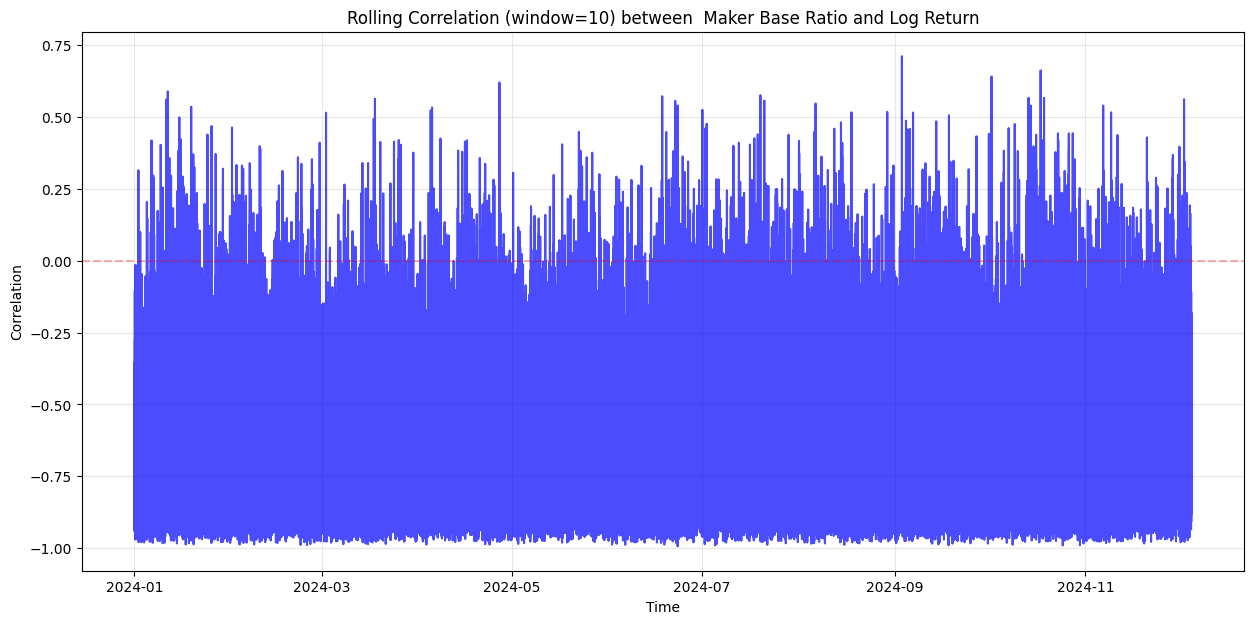

Overall correlation between  maker_base_ratio and log_return: -0.308


In [54]:

# 2. Calculate rolling correlation between standardized ratio and log_return
window = 10  # size doesn't matter !!! 
df['rolling_corr_std'] = df['maker_base_ratio'].rolling(window=window).corr(df['log_return'])

# 3. Plot the results
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['rolling_corr_std'], color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.3)
plt.title(f'Rolling Correlation (window={window}) between  Maker Base Ratio and Log Return')
plt.ylabel('Correlation')
plt.xlabel('Time')
plt.grid(True, alpha=0.3)
plt.show()

# 4. Print overall correlation for comparison
print("Overall correlation between  maker_base_ratio and log_return:", 
      df['maker_base_ratio'].corr(df['log_return']).round(4))

""" 

The Relationship:


- When maker_base_ratio < 1: makers are selling more than buying (takers buying more)
- When maker_base_ratio > 1: makers are buying more than selling (takers selling more)
The negative correlation (-0.308) means that:

- When returns are positive (price going up), maker_base_ratio tends to be lower
- When returns are negative (price going down), maker_base_ratio tends to be higher




- Market Behavior Interpretation:


During price increases: takers are more aggressive in buying (taking liquidity), while makers are more likely to be selling (providing liquidity)
During price decreases: takers are more aggressive in selling, while makers are more likely to be buying


- Statistical Significance:


A correlation of -0.308 is moderately strong in financial markets
It suggests a consistent pattern in market microstructure

""" 

- transformed maker base ratio corr with log return 

In [ ]:
def analyze_ratio_transformations(df):
    """
    Analyze both log and combined transformations of maker_base_ratio
    """
    # Create transformations
    # Log transformation
    df['maker_ratio_log'] = np.log1p(df['maker_base_ratio'])
    
    # Combined transformation (Winsor + Log + Standardize)
    ratio_winsor = np.clip(df['maker_base_ratio'], 
                          df['maker_base_ratio'].quantile(0.05), 
                          df['maker_base_ratio'].quantile(0.95))
    ratio_log = np.log1p(ratio_winsor)
    df['maker_ratio_combined'] = (ratio_log - ratio_log.mean()) / ratio_log.std()
    
    # Calculate rolling correlations with log_return
    window = 60
    df['corr_log'] = df['maker_ratio_log'].rolling(window=window).corr(df['log_return'])
    df['corr_combined'] = df['maker_ratio_combined'].rolling(window=window).corr(df['log_return'])
    
    # Plot correlations
    plt.figure(figsize=(15, 10))
    
    # Rolling correlations
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['corr_log'], label='Log Transform', color='blue', alpha=0.7)
    plt.plot(df.index, df['corr_combined'], label='Combined Transform', color='red', alpha=0.7)
    plt.axhline(y=0, color='grey', linestyle='--', alpha=0.3)
    plt.title(f'Rolling Correlation with Returns (window={window})')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Scatter plots
    plt.subplot(2, 2, 3)
    plt.scatter(df['maker_ratio_log'], df['log_return'], alpha=0.1)
    plt.title('Log Transform vs Returns')
    plt.xlabel('Log Transformed Ratio')
    plt.ylabel('Log Return')
    
    plt.subplot(2, 2, 4)
    plt.scatter(df['maker_ratio_combined'], df['log_return'], alpha=0.1)
    plt.title('Combined Transform vs Returns')
    plt.xlabel('Combined Transformed Ratio')
    plt.ylabel('Log Return')
    
    plt.tight_layout()
    plt.show()
    
    # Print overall correlations
    print("\nOverall Correlations with log_return:")
    print(f"Log Transform: {df['maker_ratio_log'].corr(df['log_return']):.4f}")
    print(f"Combined Transform: {df['maker_ratio_combined'].corr(df['log_return']):.4f}")
    
    # Print basic statistics
    print("\nBasic Statistics:")
    for col in ['maker_ratio_log', 'maker_ratio_combined']:
        print(f"\n{col}:")
        print(df[col].describe().round(4))
        print(f"Skewness: {df[col].skew():.4f}")
        print(f"Kurtosis: {df[col].kurtosis():.4f}")

# Run the analysis
analyze_ratio_transformations(df)

- without look ahead
    - look at diff window


Correlation Analysis:
--------------------------------------------------
Overall correlation: -0.5529

Rolling Correlation Statistics:
Mean: -0.6886
Std: 0.0959
Min: -0.9453
Max: 0.0643

Periods of positive correlation: 4 (0.00%)
Periods of negative correlation: 488126 (100.00%)


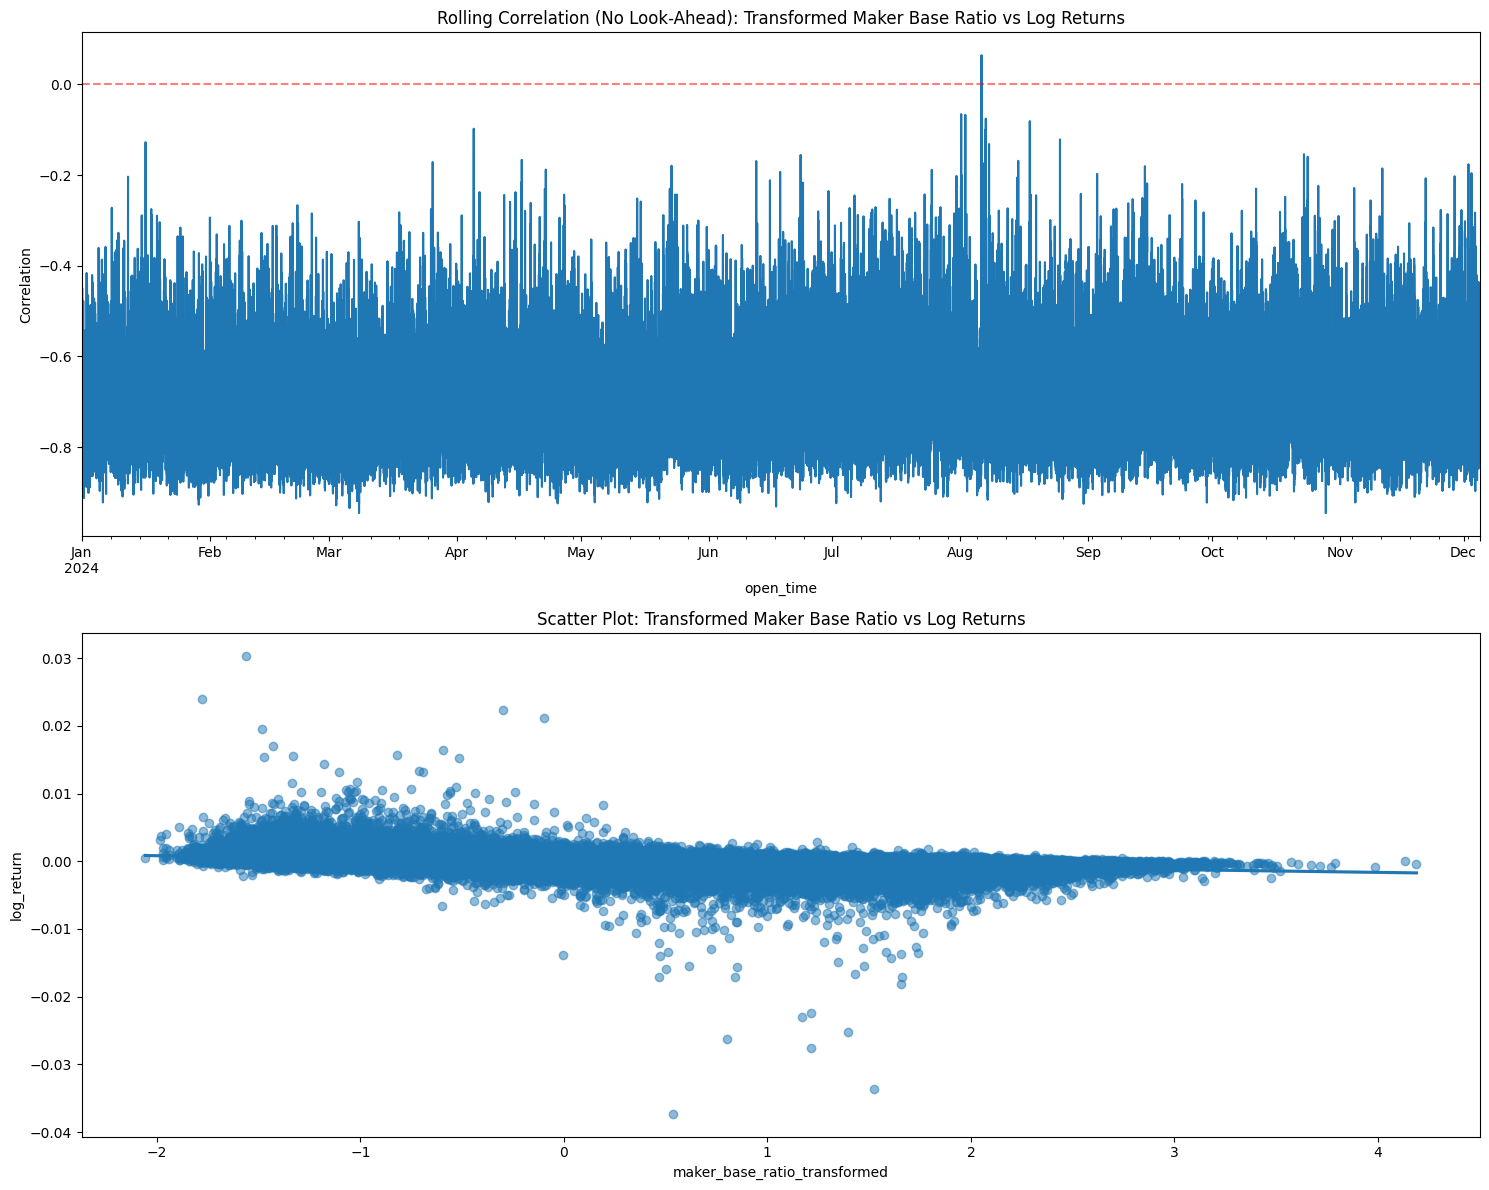

In [63]:
def calculate_moving_correlation_no_lookahead(df, window=30, min_periods=30):
    """
    Calculate moving correlation between transformed maker base ratio and log returns
    without look-ahead bias
    """
    rolling_corr = pd.Series(index=df.index, dtype=float)
    
    # Iterate through the data using only past information
    for i in range(len(df)):
        if i < min_periods:
            rolling_corr.iloc[i] = np.nan
            continue
            
        # Use only past window data for both series
        past_window_start = max(0, i-window)
        past_window_end = i+1  # Include current point
        
        # Extract past window data
        past_ratio = df['maker_base_ratio_transformed'].iloc[past_window_start:past_window_end]
        past_returns = df['log_return'].iloc[past_window_start:past_window_end]
        
        # Calculate correlation using only past data
        current_corr = past_ratio.corr(past_returns)
        rolling_corr.iloc[i] = current_corr
    
    return rolling_corr

def analyze_correlation_stats(df, rolling_corr):
    """
    Analyze and print statistics about the correlation
    """
    print("\nCorrelation Analysis:")
    print("-" * 50)
    
    # Remove NaN values for statistics
    rolling_corr_clean = rolling_corr.dropna()
    
    # Overall correlation using only complete data
    valid_data = df.dropna(subset=['maker_base_ratio_transformed', 'log_return'])
    overall_corr = valid_data['maker_base_ratio_transformed'].corr(valid_data['log_return'])
    print(f"Overall correlation: {overall_corr:.4f}")
    
    # Rolling correlation statistics
    print("\nRolling Correlation Statistics:")
    print(f"Mean: {rolling_corr_clean.mean():.4f}")
    print(f"Std: {rolling_corr_clean.std():.4f}")
    print(f"Min: {rolling_corr_clean.min():.4f}")
    print(f"Max: {rolling_corr_clean.max():.4f}")
    
    # Count periods of positive/negative correlation
    pos_corr = (rolling_corr_clean > 0).sum()
    neg_corr = (rolling_corr_clean < 0).sum()
    total = len(rolling_corr_clean)
    print(f"\nPeriods of positive correlation: {pos_corr} ({pos_corr/total*100:.2f}%)")
    print(f"Periods of negative correlation: {neg_corr} ({neg_corr/total*100:.2f}%)")

def plot_correlation_analysis(df, rolling_corr):
    """
    Create plots to visualize the correlation analysis
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot 1: Rolling Correlation over time
    rolling_corr.plot(ax=ax1)
    ax1.set_title('Rolling Correlation (No Look-Ahead): Transformed Maker Base Ratio vs Log Returns')
    ax1.set_ylabel('Correlation')
    ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)
    
    # Plot 2: Scatter plot with regression line (using all data)
    valid_data = df.dropna(subset=['maker_base_ratio_transformed', 'log_return'])
    sns.regplot(
        data=valid_data,
        x='maker_base_ratio_transformed',
        y='log_return',
        scatter_kws={'alpha':0.5},
        ax=ax2
    )
    ax2.set_title('Scatter Plot: Transformed Maker Base Ratio vs Log Returns')
    
    plt.tight_layout()
    plt.show()



# Calculate rolling correlation without look-ahead
rolling_correlation = calculate_moving_correlation_no_lookahead(df)

# Analyze correlation statistics
analyze_correlation_stats(df, rolling_correlation)

# Plot correlation analysis
plot_correlation_analysis(df, rolling_correlation)

### Deep analysis of combined trans maker base ratio 

- before we fit the model 

In [ ]:
def analyze_log_returns(df):
   """
   Analyze log returns distribution and statistics
   """
   # Create subplot with histplot and boxplot
   fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
   fig.suptitle('Log Returns Analysis')

   # Histogram with KDE
   sns.histplot(df['log_return'], bins=500, kde=False, ax=ax1)
   ax1.axvline(x=0, color='r', linestyle='--', alpha=0.5)
   ax1.set_title('Distribution of Log Returns')
   ax1.set_xlabel('Log Return')
   ax1.set_ylabel('Count')
   ax1.set_xlim(-0.01, 0.01)

   # Box plot
   sns.boxplot(y=df['log_return'], ax=ax2)
   ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)
   ax2.set_title('Box Plot of Log Returns')
   ax2.set_ylabel('Log Return')

   plt.tight_layout()
   plt.show()

   # Calculate basic statistics
   stats = {
       'mean': df['log_return'].mean(),
       'std': df['log_return'].std(),
       'skew': df['log_return'].skew(),
       'kurtosis': df['log_return'].kurtosis(),
       'min': df['log_return'].min(),
       'max': df['log_return'].max(),
       'median': df['log_return'].median(),
       '25%': df['log_return'].quantile(0.25),
       '75%': df['log_return'].quantile(0.75)
   }

   print("\nLog Returns Statistics:")
   for name, value in stats.items():
       print(f"{name}: {value:.6f}")

   # Additional analysis
   print("\nAdditional Metrics:")
   print(f"Percentage of positive returns: {(df['log_return'] > 0).mean()*100:.2f}%")
   print(f"Percentage of negative returns: {(df['log_return'] < 0).mean()*100:.2f}%")
   print(f"Percentage of zero returns: {(df['log_return'] == 0).mean()*100:.2f}%")
   
   # Calculate volatility (annualized)
   minutes_per_year = 365 * 24 * 60
   volatility = df['log_return'].std() * np.sqrt(minutes_per_year)
   print(f"\nAnnualized Volatility: {volatility*100:.2f}%")

# Call the function
analyze_log_returns(btc_data)

- OLS : t dist  (heavy tails)

In [ ]:
btc_data

OLS 

In [ ]:
import statsmodels.api as sm
from scipy import stats

def fit_ols_t_distribution(df):
    """
    Fit OLS with t-distribution after cleaning data
    """
    # Create clean copy of data
    df_clean = df.copy()
    
    # Print initial data info
    print("Initial data shape:", df_clean.shape)
    print("\nMissing values:")
    print(df_clean[['maker_ratio_combined', 'volume', 'log_return']].isna().sum())
    print("\nInfinite values:")
    print(np.isinf(df_clean[['maker_ratio_combined', 'volume', 'log_return']]).sum())
    
    # Remove inf and nan values
    df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
    df_clean = df_clean.dropna(subset=['maker_ratio_combined', 'volume', 'log_return'])
    
    print("\nCleaned data shape:", df_clean.shape)
    
    # Prepare the data
    X = df_clean[['maker_ratio_combined']].copy()
    X = sm.add_constant(X)
    y = df_clean['log_return']

        # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Print OLS summary
    print("\nOLS Regression Results:")
    print(model.summary())

    # Plot actual vs fitted values
    plt.figure(figsize=(12, 8))
    
    # Subplot 1: Scatter plot of actual vs fitted
    plt.subplot(2, 2, 1)
    plt.scatter(y, model.fittedvalues, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Log Returns')
    plt.ylabel('Fitted Values')
    plt.title('Actual vs Fitted Values')

    # Subplot 2: Residuals distribution
    plt.subplot(2, 2, 2)
    residuals = model.resid
    sns.histplot(residuals, kde=True)
    plt.title('Distribution of Residuals')
    
    # Subplot 3: Maker Ratio vs Log Return
    plt.subplot(2, 2, 3)
    plt.scatter(X['maker_ratio_combined'], y, alpha=0.5)
    plt.xlabel('Maker Ratio Combined')
    plt.ylabel('Log Return')
    plt.title('Maker Ratio vs Log Return')


    # Fit t-distribution to residuals
    t_params = stats.t.fit(residuals)
    print("\nT-Distribution Parameters for Residuals:")
    print(f"Degrees of Freedom: {t_params[0]:.4f}")
    print(f"Location: {t_params[1]:.4f}")
    print(f"Scale: {t_params[2]:.4f}")

    # Plot residuals with fitted t-distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, stat='density', kde=True, label='Residuals')
    
    x = np.linspace(residuals.min(), residuals.max(), 100)
    t_pdf = stats.t.pdf(x, *t_params)
    plt.plot(x, t_pdf, 'r-', lw=2, label='Fitted t-distribution')
    
    plt.title('Residuals Distribution with Fitted t-Distribution')
    plt.legend()
    plt.show()

    return model

    # Call the function


model = fit_ols_t_distribution(df)



Robust t dist 

In [ ]:
def fit_robust_t_distribution(df):
    """
    Fit robust regression with t-distribution using statsmodels
    """
    # Clean data as before
    df_clean = df.copy()
    print("Initial data shape:", df_clean.shape)
    
    df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
    df_clean = df_clean.dropna(subset=['maker_ratio_combined', 'volume', 'log_return'])
    print("Cleaned data shape:", df_clean.shape)
    
    # Prepare the data
    X = df_clean[['maker_ratio_combined']].copy()
    X = sm.add_constant(X)
    y = df_clean['log_return']

    # Fit robust regression with t-distribution
    rlm_model = sm.RLM(y, X, M=sm.robust.norms.TukeyBiweight()).fit()
    
    # Compare with standard OLS
    ols_model = sm.OLS(y, X).fit()
    
    # Analyze residuals
    residuals = rlm_model.resid
    
    # Fit t-distribution to residuals with maximum likelihood
    t_params = stats.t.fit(residuals)
    
    # Calculate metrics
    aic = 2 * len(t_params) - 2 * stats.t.logpdf(residuals, *t_params).sum()
    bic = len(t_params) * np.log(len(residuals)) - 2 * stats.t.logpdf(residuals, *t_params).sum()
    
    # Calculate additional statistics
    ks_stat = stats.kstest(residuals, 't', t_params)[0]
    
    # Print results
    print("\nRobust Regression Results:")
    print("==========================")
    print(rlm_model.summary(yname='Log Return', xname=['const', 'Maker Ratio']))
    
    print("\nT-Distribution Parameters:")
    print("=========================")
    print(f"Degrees of Freedom: {t_params[0]:.4f}")
    print(f"Location: {t_params[1]:.6f}")
    print(f"Scale: {t_params[2]:.6f}")
    
    print("\nModel Fit Statistics:")
    print("====================")
    print(f"AIC: {aic:.4f}")
    print(f"BIC: {bic:.4f}")
    print(f"KS Statistic: {ks_stat:.4f}")
    
    # Calculate risk measures
    VaR_95 = stats.t.ppf(0.05, *t_params)
    VaR_99 = stats.t.ppf(0.01, *t_params)
    ES_95 = -stats.t.expect(lambda x: x, args=(t_params[0],), 
                           loc=t_params[1], scale=t_params[2], 
                           lb=-np.inf, ub=VaR_95)
    
    print("\nRisk Measures:")
    print("=============")
    print(f"95% VaR: {-VaR_95:.6f}")
    print(f"99% VaR: {-VaR_99:.6f}")
    print(f"95% Expected Shortfall: {ES_95:.6f}")
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Original scatter with robust fit
    axes[0,0].scatter(X['maker_ratio_combined'], y, alpha=0.1)
    axes[0,0].plot(X['maker_ratio_combined'], rlm_model.fittedvalues, 'r-', lw=2)
    axes[0,0].set_xlabel('Maker Ratio Combined')
    axes[0,0].set_ylabel('Log Return')
    axes[0,0].set_title('Data with Robust Fit')
    
    # Plot 2: Residuals histogram with t-distribution fit
    x = np.linspace(residuals.min(), residuals.max(), 1000)
    t_pdf = stats.t.pdf(x, *t_params)
    
    sns.histplot(residuals, stat='density', kde=True, ax=axes[0,1])
    axes[0,1].plot(x, t_pdf, 'r-', label='Fitted t-distribution')
    axes[0,1].set_title('Residuals with T-Distribution Fit')
    axes[0,1].legend()
    
    # Plot 3: Q-Q plot
    stats.probplot(residuals, dist='t', sparams=t_params[0], plot=axes[1,0])
    axes[1,0].set_title('Q-Q Plot (T-Distribution)')
    
    # Plot 4: Log scale view
    axes[1,1].set_yscale('log')
    sns.histplot(residuals, stat='density', kde=True, ax=axes[1,1])
    axes[1,1].plot(x, t_pdf, 'r-', label='Fitted t-distribution')
    axes[1,1].set_title('Log Scale View')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    return rlm_model, t_params, aic, bic, residuals

# Run the analysis
model, t_params, aic, bic, residuals = fit_robust_t_distribution(df)

result
- student t has the best fit 

### Causality test 

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd

def analyze_causality_and_var(df):
    """
    Perform Granger causality tests and VAR modeling
    """
    # Prepare data
    df_clean = df.copy()
    df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
    df_clean = df_clean.dropna(subset=['maker_ratio_combined', 'log_return'])
    
    # Create time series variables
    ts_data = pd.DataFrame({
        'maker_ratio': df_clean['maker_ratio_combined'],
        'returns': df_clean['log_return']
    })
    
    # Granger causality test
    print("Granger Causality Tests:")
    print("=======================")
    print("\nTesting if maker_ratio Granger-causes returns:")
    gc_maker_to_returns = grangercausalitytests(ts_data[['returns', 'maker_ratio']], maxlag=5)
    
    print("\nTesting if returns Granger-cause maker_ratio:")
    gc_returns_to_maker = grangercausalitytests(ts_data[['maker_ratio', 'returns']], maxlag=5)
    
    # VAR model
    var_model = VAR(ts_data)
    
    # Select lag order
    lag_order = var_model.select_order(maxlags=10)
    print("\nVAR Lag Order Selection:")
    print(lag_order.summary())
    
    # Fit VAR model
    model_fitted = var_model.fit(lag_order.aic)
    print("\nVAR Model Summary:")
    print(model_fitted.summary())
    
    # Impulse Response Analysis
    irf = model_fitted.irf(periods=10)
    
    # Plot IRF
    plt.figure(figsize=(12, 8))
    irf.plot()
    plt.title('Impulse Response Functions')
    plt.tight_layout()
    plt.show()
    
    return model_fitted, irf

# Run the analysis
var_model, irf = analyze_causality_and_var(df)

## Trading Strategy 

In [ ]:
def analyze_trading_patterns(df):
    """
    Analyze trading patterns based on return -> maker ratio relationship
    """
    # Prepare clean data
    df_clean = df.copy()
    df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
    df_clean = df_clean.dropna(subset=['maker_ratio_combined', 'log_return'])
    
    # Create lagged returns
    df_clean['return_lag1'] = df_clean['log_return'].shift(1)
    df_clean['maker_ratio_next'] = df_clean['maker_ratio_combined'].shift(-1)
    
    # Create return buckets for analysis
    df_clean['return_quintile'] = pd.qcut(df_clean['return_lag1'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
    
    # Calculate future maker ratio changes
    df_clean['maker_ratio_change'] = df_clean['maker_ratio_next'] - df_clean['maker_ratio_combined']
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Return quintiles vs next period maker ratio
    sns.boxplot(data=df_clean, x='return_quintile', y='maker_ratio_next', ax=axes[0,0])
    axes[0,0].set_title('Next Period Maker Ratio by Return Quintile')
    axes[0,0].set_xlabel('Return Quintile')
    axes[0,0].set_ylabel('Next Period Maker Ratio')
    
    # Plot 2: Scatter with regression line
    sns.regplot(data=df_clean, x='return_lag1', y='maker_ratio_next', 
                scatter_kws={'alpha':0.1}, ax=axes[0,1])
    axes[0,1].set_title('Lagged Return vs Next Period Maker Ratio')
    axes[0,1].set_xlabel('Lagged Return')
    axes[0,1].set_ylabel('Next Period Maker Ratio')
    
    # Plot 3: Time series of extreme returns and subsequent maker ratios
    extreme_returns = df_clean[abs(df_clean['return_lag1']) > df_clean['return_lag1'].std()*2]
    axes[1,0].scatter(extreme_returns.index, extreme_returns['return_lag1'], 
                     c='blue', alpha=0.5, label='Extreme Return')
    axes[1,0].scatter(extreme_returns.index, extreme_returns['maker_ratio_next'],
                     c='red', alpha=0.5, label='Next Maker Ratio')
    axes[1,0].set_title('Extreme Returns and Subsequent Maker Ratios')
    axes[1,0].legend()
    
    # Plot 4: Autocorrelation of maker ratio changes
    pd.plotting.autocorrelation_plot(df_clean['maker_ratio_change'].dropna(), ax=axes[1,1])
    axes[1,1].set_title('Autocorrelation of Maker Ratio Changes')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate conditional statistics
    print("\nConditional Statistics:")
    print("======================")
    stats_by_quintile = df_clean.groupby('return_quintile')['maker_ratio_next'].agg(['mean', 'std'])
    print("\nMaker Ratio Statistics by Return Quintile:")
    print(stats_by_quintile)
    
    # Calculate success rate of strategy
    df_clean['positive_change'] = df_clean['maker_ratio_change'] > 0
    success_rate = df_clean.groupby('return_quintile')['positive_change'].mean()
    print("\nSuccess Rate of Predicting Maker Ratio Direction by Return Quintile:")
    print(success_rate)
    
    # Calculate potential profit metrics
    df_clean['strategy_return'] = df_clean['maker_ratio_change'] * df_clean['return_lag1'].abs()
    print("\nStrategy Performance Metrics:")
    print("Mean Strategy Return:", df_clean['strategy_return'].mean())
    print("Sharpe Ratio:", df_clean['strategy_return'].mean() / df_clean['strategy_return'].std())
    
    return df_clean

# Run the analysis
analyzed_data = analyze_trading_patterns(df)